This notebook shows some of the functionality in PyCNO.

In [ ]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pycno

The following cell is the most simple case of simulating a single combination of PK paramters, and then plotting the results. If compartment volumes, or paramters are not specified, the default values will be used.

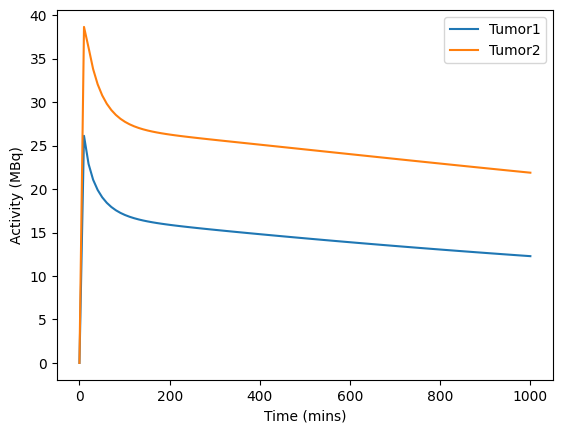

In [ ]:
compartments = {
    'Tumor1': 0.05,
    'Tumor2': 0.05
}
parameters = {
    'Rden_Tumor1': 10,
    'lambdaRel_Kidney': 0.005
}
observables = ['Tumor1', 'Tumor2', 'Kidney', 'Heart', 'SG', 'Bone', 'TumorRest', 'Spleen', 'Liver', 'Prostate', 'GI', 'Rest', 'Skin', 'Muscle', 'Brain', 'RedMarrow', 'Lungs', 'Adipose']

time, TACs = pycno.run_model(
    model_name="PSMA",
    stop=1000, 
    parameters=parameters, 
    compartments=compartments, 
    observables=observables
    )

plt.plot(time, TACs[0,:,:4]) #only first 4 observables plotted here
plt.legend(observables)
plt.ylabel('Activity (MBq)')
plt.show()

The following cell shows how to simulated multiple combinations of PK paramters. All possible combinations of given parameters are simulated here.

In [ ]:
swept_parameters = ['Rden_Kidney', 'Rden_Tumor1']
swept_values = [(Rden_Kidney,Rden_Tumor1)
                for Rden_Kidney in np.linspace(100, 500, 3)
                for Rden_Tumor1 in np.arange(100, 500, 50)
                ]

time, TACs = pycno.run_model(
    model_name="PSMA",
    stop=1000,
    swept_parameters=swept_parameters,
    swept_values=swept_values,
    observables=observables
)

  0%|          | 0/24 [00:00<?, ?it/s]

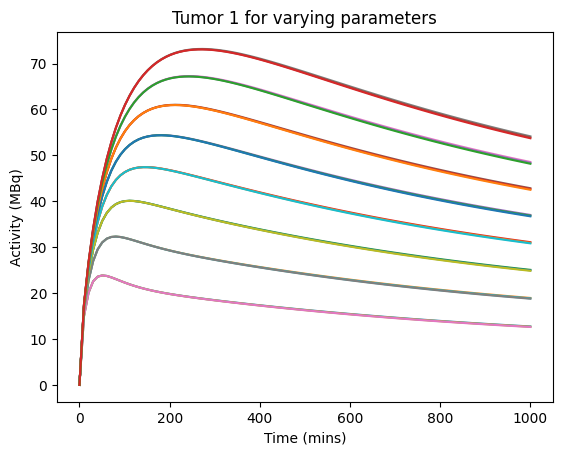

In [19]:
plt.plot(time, TACs[:,:,0].T)
plt.xlabel('Time (mins)')
plt.ylabel('Activity (MBq)')
plt.title('Tumor 1 for varying parameters')
plt.show()

If, instead of simulating combinations of parameter ranges, you want to simulate randomly generated PK paramters, you can do the following: